# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon');
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\morja\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [8]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("NEWS_API_KEY")

In [9]:
# Create a newsapi client
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=api_key)

In [13]:
# Fetch the Bitcoin news articles
btc_articles = newsapi.get_everything(
    q="bitcoin",
    language="en",
    sort_by="relevancy"
)

In [14]:
# Fetch the Ethereum news articles
eth_articles = newsapi.get_everything(
    q="ethereum",
    language="en",
    sort_by="relevancy"
)

. ref: http://www.nltk.org/howto/sentiment.html

In [15]:
# Create the Bitcoin sentiment scores DataFrame
# create list  to store sentiments dictionary
btc_sentiments = []
for article in btc_articles["articles"]:
    try:
        #retrieve content
        content = article["content"]
        # Sentiment scoring with VADER
        results = analyzer.polarity_scores(content)
        # create and append output  dictionary to list 
        btc_sentiments.append({
            "Content": content,
            "Positive": results["pos"],
            "Negative": results["neg"],
            "Neutral": results["neu"],
            "Compound": results["compound"],
        })
    except AttributeError:
        pass
    
btc_sentiments_df  = pd.DataFrame(btc_sentiments)


In [16]:
btc_sentiments_df.head(10)

,Content,Positive,Negative,Neutral,Compound
0,Just weeks after Tesla started accepting Bitco...,0.071,0.00,0.929,0.3818
1,Shares of Square are up more than 6% today aft...,0.058,0.00,0.942,0.2960
2,Tesla’s relationship with bitcoin is not a dal...,0.000,0.00,1.000,0.0000
3,Cryptocurrency continues to gain mainstream ac...,0.171,0.00,0.829,0.7506
4,Image: Tesla\r\n\n \n\n Tesla has stopped acce...,0.134,0.05,0.816,0.4939
5,Cryptocurrency prices continued to tumble Frid...,0.000,0.00,1.000,0.0000
6,The crypto industry as a whole has seen a mome...,0.135,0.00,0.865,0.6124
7,"Mark Zuckerberg posted a picture of his two, f...",0.217,0.00,0.783,0.8455
8,Tesla CEO Elon Musk has changed his stance on ...,0.071,0.00,0.929,0.3818
9,image copyrightGetty Images\r\nimage captionEl...,0.167,0.00,0.833,0.7003


In [17]:
# Create the Ethereum sentiment scores DataFrame
eth_sentiments = []

for article in eth_articles["articles"]:
    try:
        #retrieve content
        content = article["content"]
        # Sentiment scoring with VADER
        results = analyzer.polarity_scores(content)
        # create and append output  dictionary to list 
        eth_sentiments.append({
            "Content": content,
            "Positive": results["pos"],
            "Negative": results["neg"],
            "Neutral": results["neu"],
            "Compound": results["compound"],
        })
    except AttributeError:
        pass
    
eth_sentiments_df  = pd.DataFrame(eth_sentiments)

In [18]:
eth_sentiments_df.head(10)

,Content,Positive,Negative,Neutral,Compound
0,"Vitalik Buterin, the creator of Ethereum, on W...",0.060,0.000,0.940,0.2263
1,Their investors call them disruptive innovator...,0.054,0.111,0.835,-0.2144
2,Cryptocurrency continues to gain mainstream ac...,0.171,0.000,0.829,0.7506
3,Venmo is jumping aboard the cryptocurrency ban...,0.034,0.000,0.966,0.0258
4,New York (CNN Business)Bitcoin prices continue...,0.000,0.000,1.000,0.0000
5,"The creators behind CryptoPunks, one of the mo...",0.091,0.000,0.909,0.4754
6,"ConsenSys, a key player in crypto and a major ...",0.062,0.000,0.938,0.2732
7,By Reuters Staff\r\nFILE PHOTO: A representati...,0.000,0.000,1.000,0.0000
8,A representation of virtual currency Ethereum ...,0.000,0.000,1.000,0.0000
9,"It took a while to get here, but Dfinity is fi...",0.000,0.000,1.000,0.0000


In [19]:
# Describe the Bitcoin Sentiment
btc_sentiments_df.describe()

,Positive,Negative,Neutral,Compound
count,20.000000,20.000000,20.000000,20.000000
mean,0.087700,0.012850,0.899500,0.325535
std,0.075245,0.026867,0.080753,0.349802
min,0.000000,0.000000,0.777000,-0.476700
25%,0.000000,0.000000,0.824750,0.000000
50%,0.071000,0.000000,0.924000,0.342950
75%,0.160250,0.000000,0.974500,0.634375
max,0.217000,0.081000,1.000000,0.845500


In [20]:
# Describe the Ethereum Sentiment
eth_sentiments_df.describe()

,Positive,Negative,Neutral,Compound
count,20.000000,20.000000,20.00000,20.000000
mean,0.044850,0.009250,0.94590,0.131840
std,0.058756,0.029097,0.06369,0.285022
min,0.000000,0.000000,0.79000,-0.340000
25%,0.000000,0.000000,0.92400,0.000000
50%,0.036000,0.000000,0.95800,0.012900
75%,0.060500,0.000000,1.00000,0.238025
max,0.210000,0.111000,1.00000,0.817600


Analysis to answer questions

In [21]:
# Mean positive analysis
if (btc_sentiments_df.describe().loc["mean"]["Positive"]) >(eth_sentiments_df.describe().loc["mean"]["Positive"]):
    print("BTC has the highest mean positive score")
   
else:
    print("ETH has the highest mean positive score")

BTC has the highest mean positive score


In [22]:
# compound score analysis
if (btc_sentiments_df.describe().loc["max"]["Compound"]) >(eth_sentiments_df.describe().loc["max"]["Compound"]):
    print("BTC has the highest compound  score")
   
else:
    print("ETH has the highest compund  score")

BTC has the highest compound  score


In [23]:
# Highest positive analysis
if (btc_sentiments_df.describe().loc["max"]["Positive"]) >(eth_sentiments_df.describe().loc["max"]["Positive"]):
    print("BTC has the highest  positive score")
   
else:
    print("ETH has the highest  positive score")

BTC has the highest  positive score


### Questions:

Q: Which coin had the highest mean positive score?

A: BTC has the highest mean positive score 

Q: Which coin had the highest compound score?

A:  BTC has the highest compound  score

Q. Which coin had the highest positive score?

A: BTC has the highest  positive score

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [24]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [25]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer() 

# Create a list of stopwords
stop_words = stopwords.words('english')

# Expand the default stopwords list if necessary
sw_addons = ['’', "'re", 'file', 'photo', '\`', "\r","\n",'announced',"char", 'week', 'basically', 'also','by','reuters','by','chars',"-lrb-","-rrb-","-lsb-","-rsb-"]
stop_words.extend(sw_addons)
stop_words = set(stop_words)

In [26]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""

    # Create a tokenized list of the words
    tokens = word_tokenize(text)
    
    # Remove the punctuation from text
    tokens =list(filter(lambda t: t not in punctuation,tokens ))

    # Remove dates and time within the text
    tokens = filter(lambda w: not re.match('^(?:(?:[0-9]{2}[:\/,]){2}[0-9]{2,4}|am|pm)$', w),tokens)
    tokens = [re.sub(r"(\d{4}\-\d{2}\-\d{2}|\d{2}/\d{2}/\d{4})", "", w) for w in tokens]
        
    # Lemmatize words into root words
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

   
    # Convert the words to lowercase
    tokens = list(filter(lambda t: t.lower(), tokens))
    
    # Remove the stop words
    tokens =[token.lower() for token in tokens if token.lower() not in stop_words]
            
    return tokens

In [52]:
# Create a new tokens column for Bitcoin
btc_sentiments_df["tokens"] = btc_sentiments_df["Content"].apply(tokenizer)
btc_sentiments_df.head()


,Content,Positive,Negative,Neutral,Compound,tokens
0,Just weeks after Tesla started accepting Bitco...,0.071,0.00,0.929,0.3818,"[tesla, started, accepting, bitcoin, currency,..."
1,Shares of Square are up more than 6% today aft...,0.058,0.00,0.942,0.2960,"[shares, square, 6, today, american, fintech, ..."
2,Tesla’s relationship with bitcoin is not a dal...,0.000,0.00,1.000,0.0000,"[tesla, relationship, bitcoin, dalliance, acco..."
3,Cryptocurrency continues to gain mainstream ac...,0.171,0.00,0.829,0.7506,"[cryptocurrency, continues, gain, mainstream, ..."
4,Image: Tesla\r\n\n \n\n Tesla has stopped acce...,0.134,0.05,0.816,0.4939,"[image, tesla, tesla, ha, stopped, accepting, ..."


In [28]:
# Create a new tokens column for Ethereum
eth_sentiments_df["tokens"] = eth_sentiments_df.Content.apply(tokenizer)
eth_sentiments_df.head()

,Content,Positive,Negative,Neutral,Compound,tokens
0,"Vitalik Buterin, the creator of Ethereum, on W...",0.060,0.000,0.940,0.2263,"[vitalik, buterin, creator, ethereum, wednesda..."
1,Their investors call them disruptive innovator...,0.054,0.111,0.835,-0.2144,"[investor, call, disruptive, innovator, detrac..."
2,Cryptocurrency continues to gain mainstream ac...,0.171,0.000,0.829,0.7506,"[cryptocurrency, continues, gain, mainstream, ..."
3,Venmo is jumping aboard the cryptocurrency ban...,0.034,0.000,0.966,0.0258,"[venmo, jumping, aboard, cryptocurrency, bandw..."
4,New York (CNN Business)Bitcoin prices continue...,0.000,0.000,1.000,0.0000,"[new, york, cnn, business, bitcoin, price, con..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [29]:
from collections import Counter
from nltk import ngrams

In [30]:
# Generate the Bitcoin N-grams where N=2
btc_n_grams = ngrams(btc_sentiments_df.tokens.agg(sum), n=2)
# top 10 words
Counter(btc_n_grams).most_common(10)

[(('elon', 'musk'), 5),
 (('accepting', 'bitcoin'), 3),
 (('tesla', 'ha'), 3),
 (('said', 'monday'), 3),
 (('venmo', 'app'), 2),
 (('fossil', 'fuel'), 2),
 (('ceo', 'elon'), 2),
 (('price', 'continued'), 2),
 (('ha', 'seen'), 2),
 (('institutional', 'investor'), 2)]

In [31]:
# Generate the Ethereum N-grams where N=2
eth_n_grams = ngrams(eth_sentiments_df.tokens.agg(sum), n=2)
# top 10 words
Counter(eth_n_grams).most_common(10)

[(('bitcoin', 'ethereum'), 3),
 (('representation', 'virtual'), 3),
 (('virtual', 'currency'), 3),
 (('currency', 'ethereum'), 3),
 (('ethereum', 'seen'), 3),
 (('seen', 'front'), 3),
 (('front', 'stock'), 3),
 (('stock', 'graph'), 3),
 (('graph', 'illustration'), 3),
 (('illustration', 'taken'), 3)]

In [32]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [33]:
# Use token_count to get the top 10 words for Bitcoin
token_count(btc_sentiments_df.tokens.agg(sum), N=10)

[('bitcoin', 17),
 ('tesla', 10),
 ('ha', 8),
 ('musk', 7),
 ('cryptocurrency', 7),
 ('elon', 5),
 ('company', 4),
 ('monday', 4),
 ('service', 4),
 ('said', 4)]

In [34]:
# Use token_count to get the top 10 words for Ethereum
token_count(eth_sentiments_df.tokens.agg(sum), N=10)

[('ethereum', 11),
 ('cryptocurrency', 6),
 ('bitcoin', 6),
 ('currency', 6),
 ('stock', 5),
 ('ha', 4),
 ('project', 4),
 ('major', 4),
 ('ether', 4),
 ('monday', 4)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [35]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [36]:
# set up matplotlib design parameter
plt.rcParams['axes.titlesize'] = 40
plt.rcParams['axes.titleweight'] = "bold"
colormap = "RdYlGn"

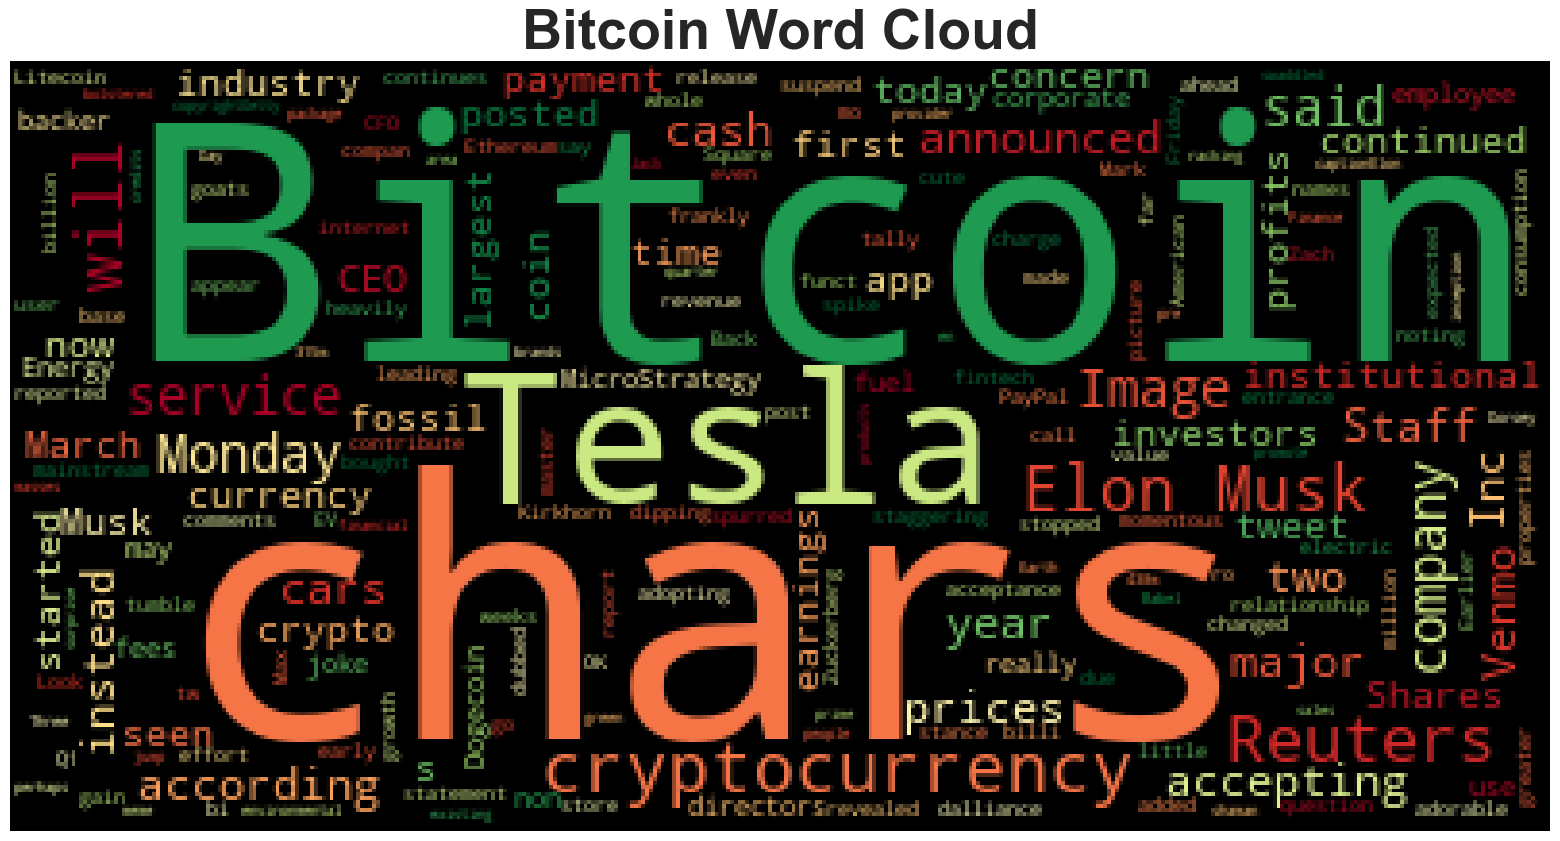

In [56]:
# Bticoin word cloud
wc = WordCloud(width=400, colormap=colormap).generate(btc_sentiments_df.Content.str.cat())
plt.title("Bitcoin Word Cloud")
plt.imshow(wc)
plt.axis("off")
plt.savefig("../Images/BitcoinCloud.png", format="png")
plt.show()

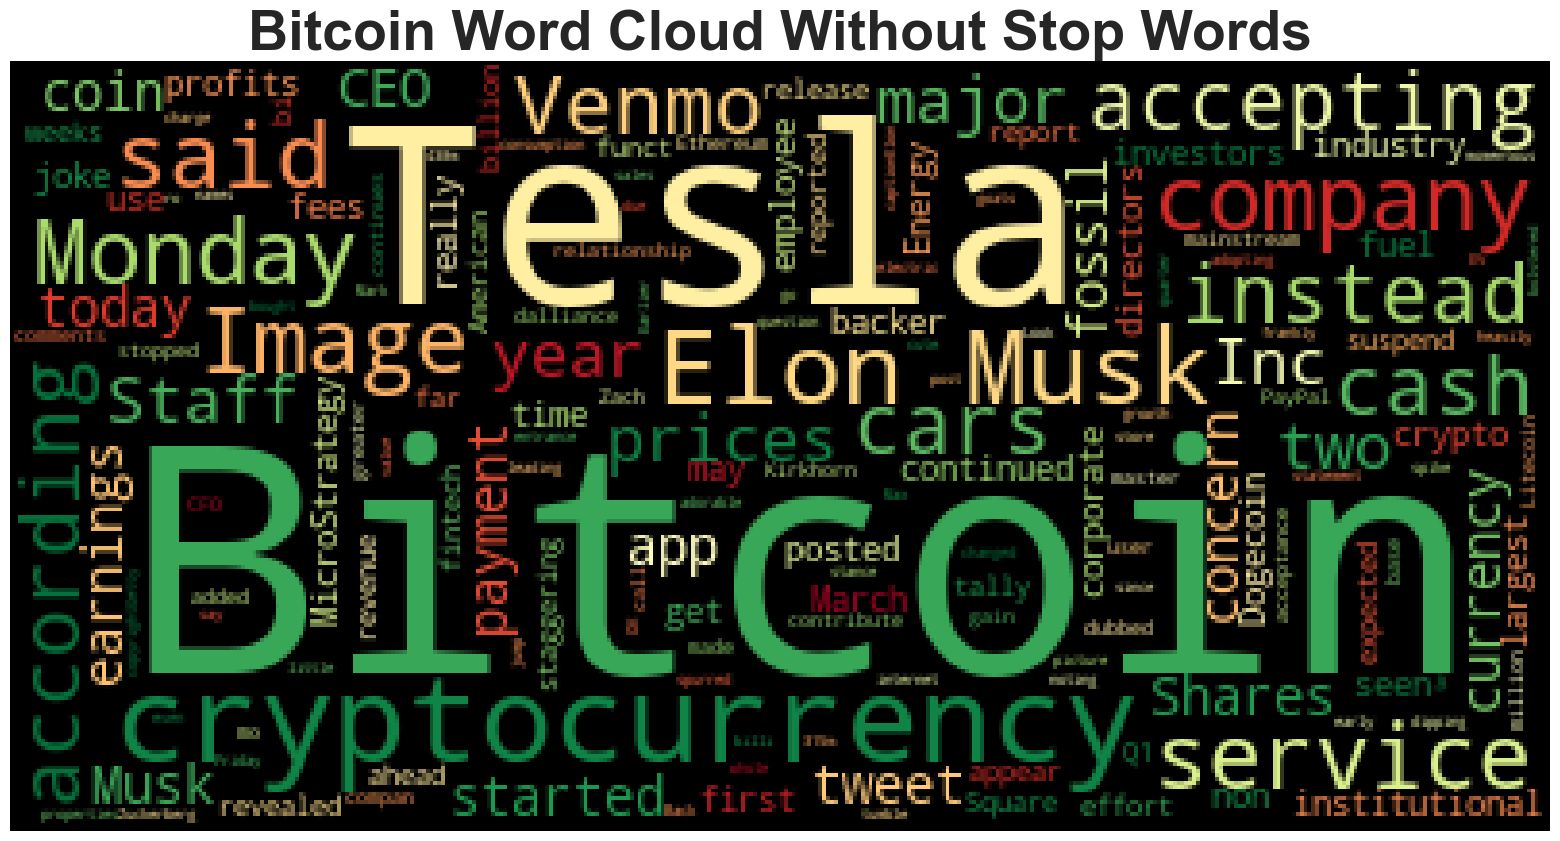

In [57]:
# Bticoin word cloud, stop words removed
wc = WordCloud(width=400, colormap=colormap, stopwords=stop_words).generate(btc_sentiments_df.Content.str.cat())
plt.title("Bitcoin Word Cloud Without Stop Words")
plt.imshow(wc)
plt.axis("off")
plt.savefig("../Images/BitcoinCloudWstop.png", format="png")
plt.show()

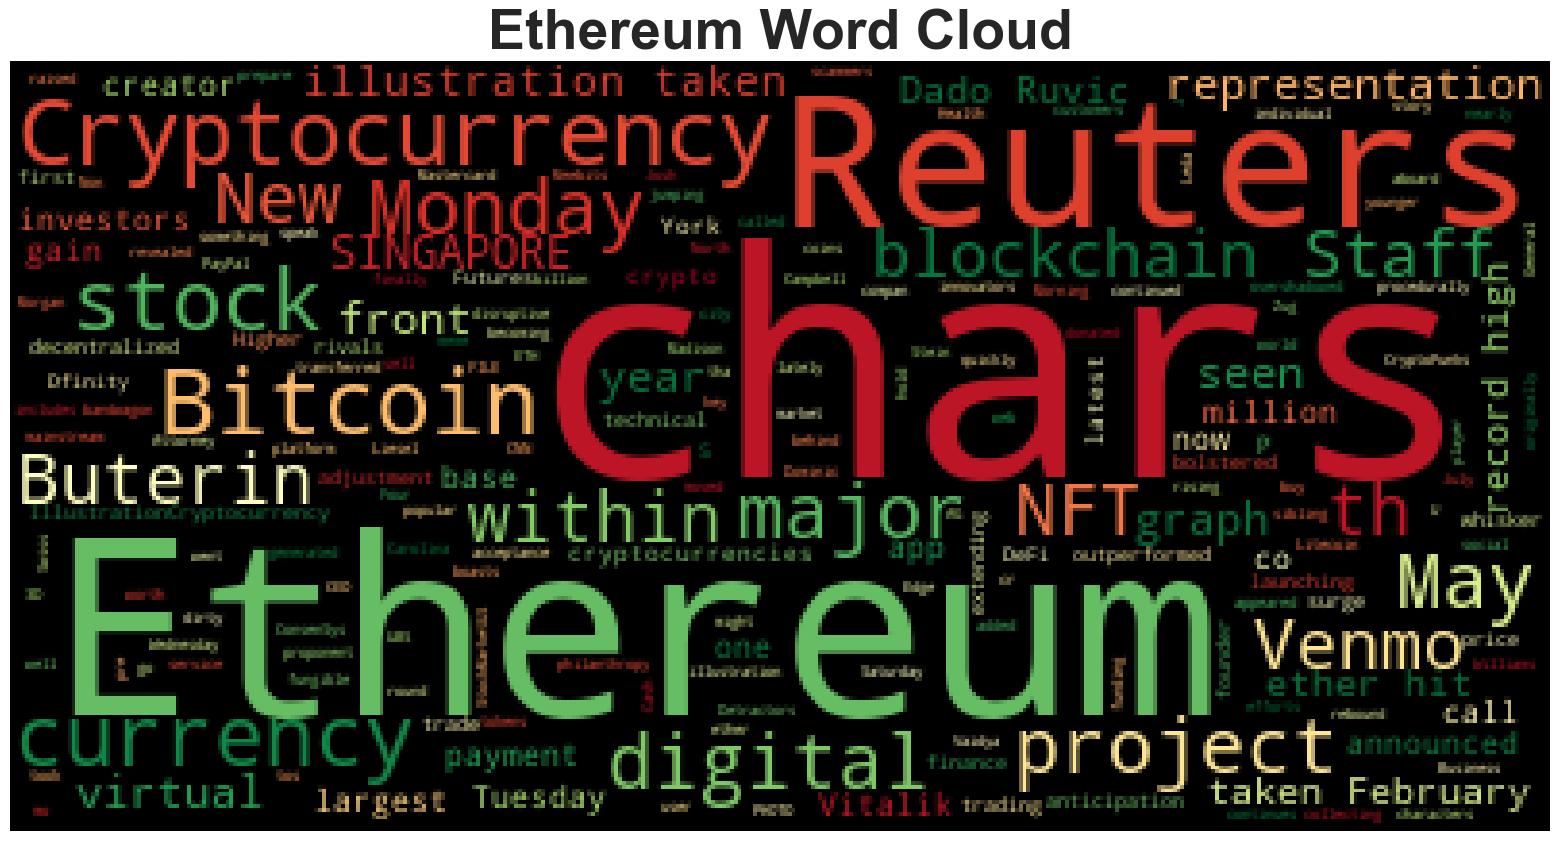

In [58]:
# Ethereum word cloud
wc = WordCloud(width=400, colormap=colormap).generate(eth_sentiments_df.Content.str.cat())
plt.title("Ethereum Word Cloud")
plt.imshow(wc)
plt.axis("off")
plt.savefig("../Images/EthCloud.png", format="png")
plt.show()

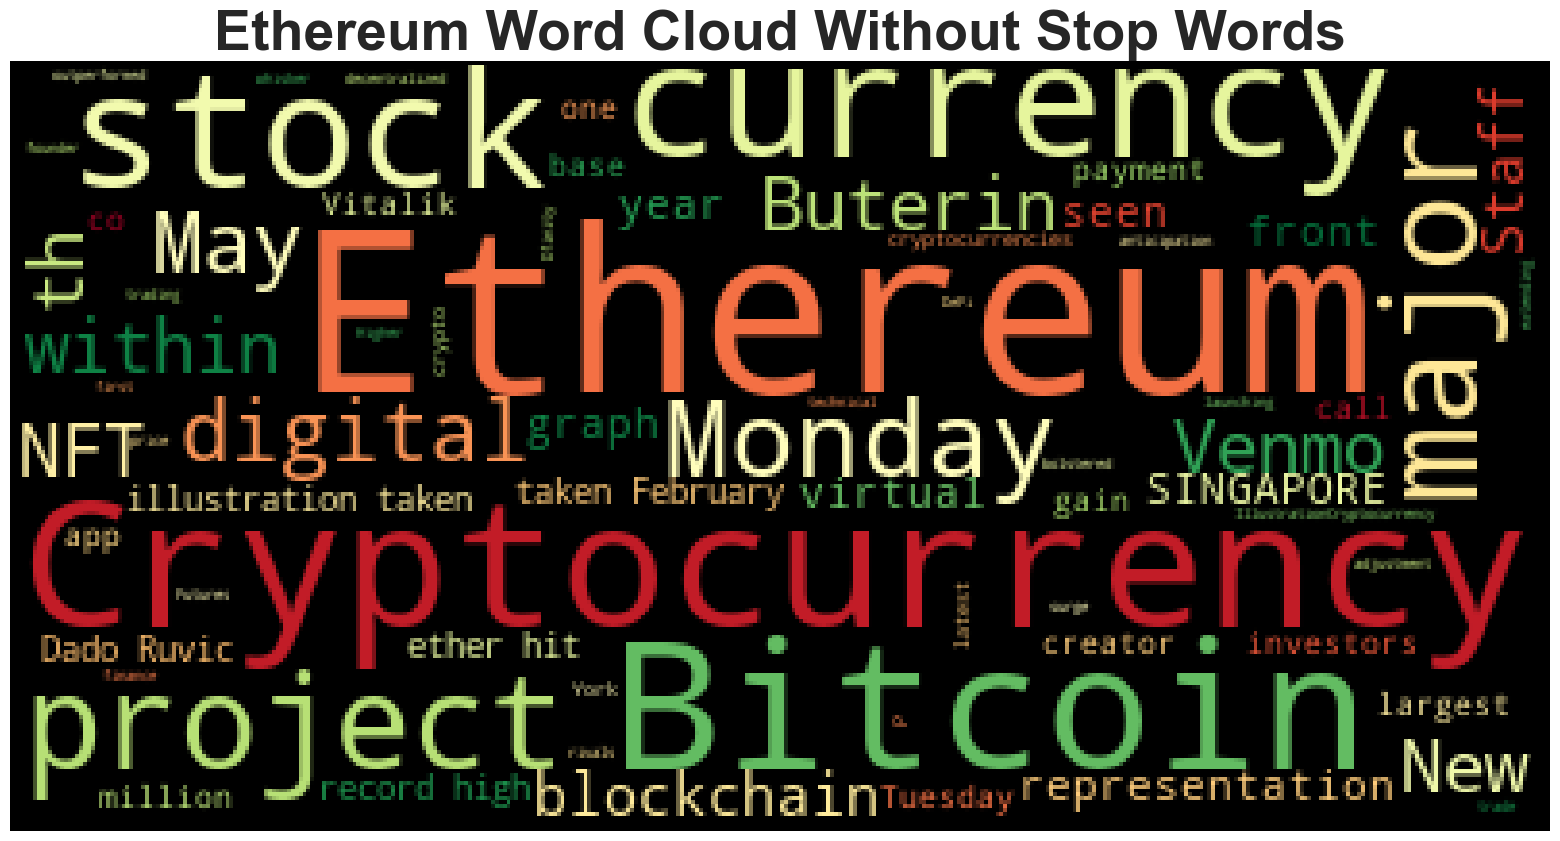

In [59]:
# Ethereum word cloud,stop words removed
wc = WordCloud(width=400, colormap=colormap, stopwords=stop_words).generate(eth_sentiments_df.Content.str.cat())
plt.title("Ethereum Word Cloud Without Stop Words")
plt.imshow(wc)
plt.axis("off")
plt.savefig("../Images/EthCloudSW.png", format="png")
plt.show()

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [41]:
import spacy
from spacy import displacy

In [42]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [43]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [44]:
# Concatenate all of the Bitcoin text together
all_btc_text = btc_sentiments_df.Content.str.cat()
all_btc_text

'Just weeks after Tesla started accepting Bitcoin as currency for cars, Elon Musk revealed in a tweet that it will "suspend" the effort. According to the release (Tesla does not appear to have a funct… [+768 chars]Shares of Square are up more than 6% today after the American fintech company reported a staggering $5.06 billion in revenue in its Q1 2021 earnings report, far ahead of an expected tally of $3.36 bi… [+2045 chars]Tesla’s relationship with bitcoin is not a dalliance, according to the comments made by the company’s CFO and dubbed “master of coin” Zach Kirkhorn during an earnings call Monday. Instead, the compan… [+3073 chars]Cryptocurrency continues to gain mainstream acceptance, as PayPal announced that they have added Bitcoin, Ethereum, Bitcoin Cash, and Litecoin to its Venmo app. With a user base of 70 million, the mo… [+2782 chars]Image: Tesla\r\n\n \n\n Tesla has stopped accepting bitcoin as payment for its cars out of concern that it will contribute to greater consumptio

In [45]:
# Run the NER processor on all of the text
btc_doc = nlp(all_btc_text)
# Add a title to the document
btc_doc.user_data["title"] = "Bitcoin Named Entity Recognition"

 ref: https://spacy.io/usage/visualizers

In [46]:
# Render the visualization
displacy.render(btc_doc, style='ent', jupyter=True)

In [47]:
# List all Entities
for entity in btc_doc.ents:
    print(f"Entity {entity.text}, has label {entity.label_}")

Entity Just weeks, has label DATE
Entity Tesla, has label ORG
Entity Bitcoin, has label PERSON
Entity Elon Musk, has label PERSON
Entity Square, has label FAC
Entity more than 6%, has label PERCENT
Entity today, has label DATE
Entity American, has label NORP
Entity $5.06 billion, has label MONEY
Entity 2021, has label DATE
Entity 3.36, has label MONEY
Entity CFO, has label ORG
Entity Zach Kirkhorn, has label PERSON
Entity Monday, has label DATE
Entity PayPal, has label ORG
Entity Bitcoin, Ethereum, has label ORG
Entity Bitcoin Cash, has label PERSON
Entity Litecoin, has label PERSON
Entity Venmo, has label PERSON
Entity 70 million, has label CARDINAL
Entity Tesla, has label ORG
Entity Elon Musk, has label PERSON
Entity Friday, has label DATE
Entity Bitcoin, has label PERSON
Entity 50,000, has label MONEY
Entity first, has label ORDINAL
Entity early March, has label DATE
Entity Bitcoin, has label PERSON
Entity a momentous year, has label DATE
Entity 2020, has label DATE
Entity Zuckerber

---

### Ethereum NER

In [48]:
# Concatenate all of the Ethereum text together
all_eth_text = eth_sentiments_df.Content.str.cat()
all_eth_text

'Vitalik Buterin, the creator of Ethereum, on Wednesday donated Ethereum and meme coins worth $1.5 billion in one of the largest-ever individual philanthropy efforts.\r\nButerin transferred 500 ETH and … [+1667 chars]Their investors call them disruptive innovators. Detractors like North Carolina Attorney General Josh Stein call them dirty scammers. But Leda Health co-founders Madison Campbell and Liesel Vaidya th… [+8679 chars]Cryptocurrency continues to gain mainstream acceptance, as PayPal announced that they have added Bitcoin, Ethereum, Bitcoin Cash, and Litecoin to its Venmo app. With a user base of 70 million, the mo… [+2782 chars]Venmo is jumping aboard the cryptocurrency bandwagon.\xa0\r\nThe social payment service announced on Tuesday that its customers can now buy, hold, and sell cryptocurrencies within the Venmo app.\xa0\r\nFour cr… [+1524 chars]New York (CNN Business)Bitcoin prices continued their rebound Saturday, rising about 6% to nearly $58,000. But the world\'s largest

In [49]:
# Run the NER processor on all of the text
eth_doc = nlp(all_eth_text)
# Add a title to the document
eth_doc.user_data["title"] = "Ethereum Named Entity Recognition"

In [50]:
# Render the visualization
displacy.render(eth_doc, style='ent', jupyter=True)

In [51]:
# List all Entities
for entity in eth_doc.ents:
    print(f"Entity {entity.text}, has label {entity.label_}")

Entity Vitalik Buterin, has label PERSON
Entity Ethereum, has label ORG
Entity Wednesday, has label DATE
Entity Ethereum, has label ORG
Entity $1.5 billion, has label MONEY
Entity Buterin, has label PERSON
Entity 500, has label CARDINAL
Entity ETH, has label ORG
Entity North Carolina, has label GPE
Entity Josh Stein, has label PERSON
Entity Madison Campbell, has label PERSON
Entity Liesel Vaidya, has label PERSON
Entity PayPal, has label ORG
Entity Bitcoin, Ethereum, has label ORG
Entity Bitcoin Cash, has label PERSON
Entity Litecoin, has label PERSON
Entity Venmo, has label PERSON
Entity 70 million, has label CARDINAL
Entity Tuesday, has label DATE
Entity Venmo, has label PERSON
Entity Four, has label CARDINAL
Entity chars]New York, has label GPE
Entity CNN, has label ORG
Entity Saturday, has label DATE
Entity about 6%, has label PERCENT
Entity nearly $58,000, has label MONEY
Entity CryptoPunks, has label ORG
Entity one, has label CARDINAL
Entity NFT, has label ORG
Entity Meebits, has

---

### Export for readme

In [54]:
from pathlib import Path
btc_svg = displacy.render(btc_doc, style="dep", jupyter=False)
output_path = Path("../Images/" + "btc_NER.svg")
output_path.open("w", encoding="utf-8").write(btc_svg)


590998

In [ ]:
eth_svg = displacy.render(eth_doc, style="dep", jupyter=False)
output_path = Path("../Images/" + "eth_NER.svg")
output_path.open("w", encoding="utf-8").write(eth_svg)